In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense


C:\Users\GA\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\GA\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\GA\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\GA\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

Reading Data Sets 

In [4]:
parse = lambda x: datetime.strptime(x,'%d-%m-%Y  %H:%M')
data = pd.read_csv('saa_data_eastern_horizontal_displacement.csv',
                  parse_dates = True, index_col=0, date_parser=parse,
                  low_memory = False)

In [5]:
parse = lambda x: datetime.strptime(x,'%d-%m-%Y %H:%M')
data1 = pd.read_csv('saa_data_western_horizontal_displacement.csv',
                  parse_dates = True, index_col=0, date_parser=parse,
                  low_memory = False)

data1.head()

,2.5,2.2,1.9,1.6,1.3,1,0.7,0.4,0.1
TIMESTAMP,,,,,,,,,
2013-05-31 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filling in the missing values using interpolation.

In [6]:

interpolated = data.interpolate(method='linear',limit_direction ='backward')
print(interpolated)

                     2.5        2.2        1.9         1.6         1.3  \
TIMESTAMP                                                                
2013-05-01 14:00:00  0.0   0.052500   0.059560   -0.013810   -0.021040   
2013-05-01 15:00:00  0.0   0.089760   0.145070    0.112400    0.069260   
2013-05-01 16:00:00  0.0   0.034560   0.073990    0.046920    0.010040   
2013-05-01 17:00:00  0.0   0.037610   0.032180    0.016420    0.000590   
2013-05-01 18:00:00  0.0   0.036890   0.104820    0.141880    0.084350   
2013-05-01 19:00:00  0.0   0.039280   0.053170    0.043180    0.015940   
2013-05-01 20:00:00  0.0   0.037600   0.057490    0.017890   -0.007600   
2013-05-01 21:00:00  0.0   0.089840   0.107270    0.046490    0.052650   
2013-05-01 22:00:00  0.0   0.085860   0.120500    0.088100    0.049430   
2013-05-01 23:00:00  0.0   0.028700   0.037040   -0.017850   -0.127300   
2013-05-02 00:00:00  0.0   0.065130   0.143900    0.099320    0.087310   
2013-05-02 01:00:00  0.0   0.031230   

In [7]:
interpolated1 = data1.interpolate(method='linear',limit_direction ='backward')
print(interpolated1)

                     2.5       2.2       1.9        1.6         1.3  \
TIMESTAMP                                                             
2013-05-31 15:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-05-31 16:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-05-31 17:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-05-31 18:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-05-31 19:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-05-31 20:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-05-31 21:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-05-31 22:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-05-31 23:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-06-01 00:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-06-01 01:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-06-01 02:00:00  0.0  0.019140   0.06582   0.284005    0.277502   
2013-0

In [8]:
print(np.isnan(interpolated).sum())
print("/n")
print(np.isnan(interpolated1).sum())

2.5    0
2.2    0
1.9    0
1.6    0
1.3    0
1      0
0.7    0
0.4    0
0.1    0
dtype: int64
/n
2.5    0
2.2    0
1.9    0
1.6    0
1.3    0
1      0
0.7    0
0.4    0
0.1    0
dtype: int64


### Resampling the time series data based on daily frequency 'D' indicates a day

In [9]:
upsampled = interpolated.resample('D').mean()
upsampled1 = interpolated1.resample('D').mean()

In [10]:
upsampled.head(2)

,2.5,2.2,1.9,1.6,1.3,1,0.7,0.4,0.1
TIMESTAMP,,,,,,,,,
2013-05-01,0.0,0.053260,0.079109,0.048162,0.012632,-0.018704,-0.008912,-0.046434,-0.122346
2013-05-02,0.0,0.044994,0.083609,0.084752,0.030311,0.004640,0.043121,-0.060192,-0.150943


In [11]:
upsampled1.head(2)

,2.5,2.2,1.9,1.6,1.3,1,0.7,0.4,0.1
TIMESTAMP,,,,,,,,,
2013-05-31,0.0,0.01914,0.06582,0.284005,0.277502,0.289312,0.248688,0.256155,0.548168
2013-06-01,0.0,0.01914,0.06582,0.284005,0.277502,0.289313,0.248687,0.256155,0.548168


In [12]:
upsampled.to_csv('cleanedSAAEASTdata.csv')
upsampled1.to_csv('cleanedSAAWESTdata.csv')

### Reading cleaned data set 

In [13]:
df = pd.read_csv('cleanedSAAEASTdata.csv', parse_dates = True, index_col = 'TIMESTAMP', low_memory = False)
dw = pd.read_csv('cleanedSAAWESTdata.csv', parse_dates = True, index_col = 'TIMESTAMP', low_memory = False)

# Exploratory Data Analytics

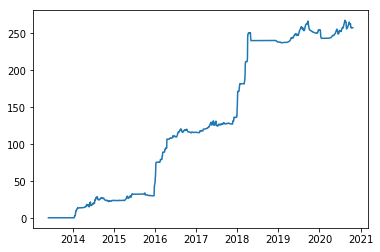

In [14]:
fig,ax=plt.subplots()
ax.plot(dw[dw.columns[-1]])

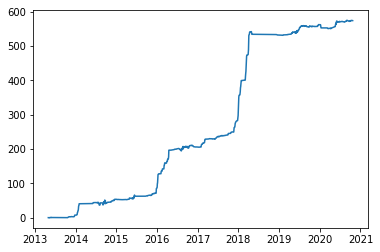

In [15]:
fig,ax=plt.subplots()
ax.plot(df[df.columns[-1]])

# Plotting the all features in various time stamps

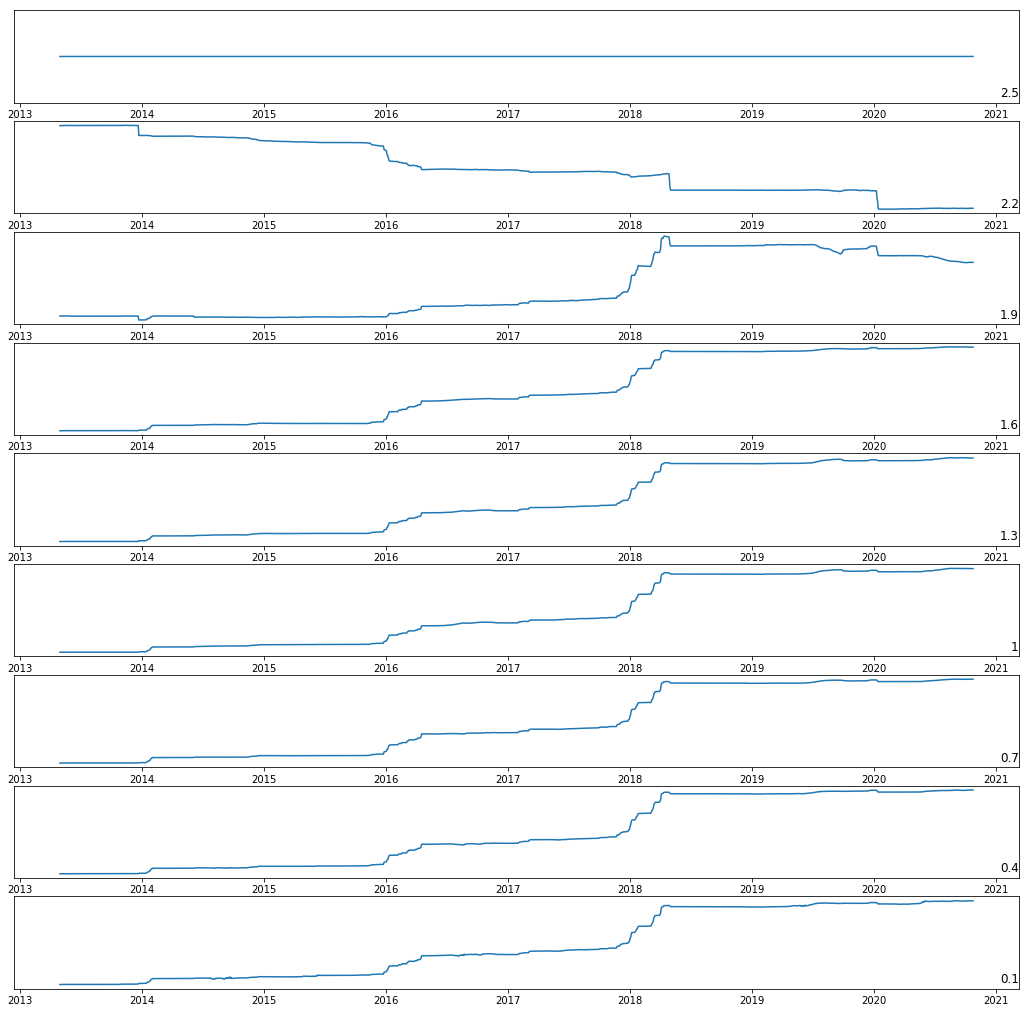

In [16]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

# Plotting data yearly

In [17]:
years = ['2013', '2014', '2015', '2016','2017', '2018', '2019', '2020']

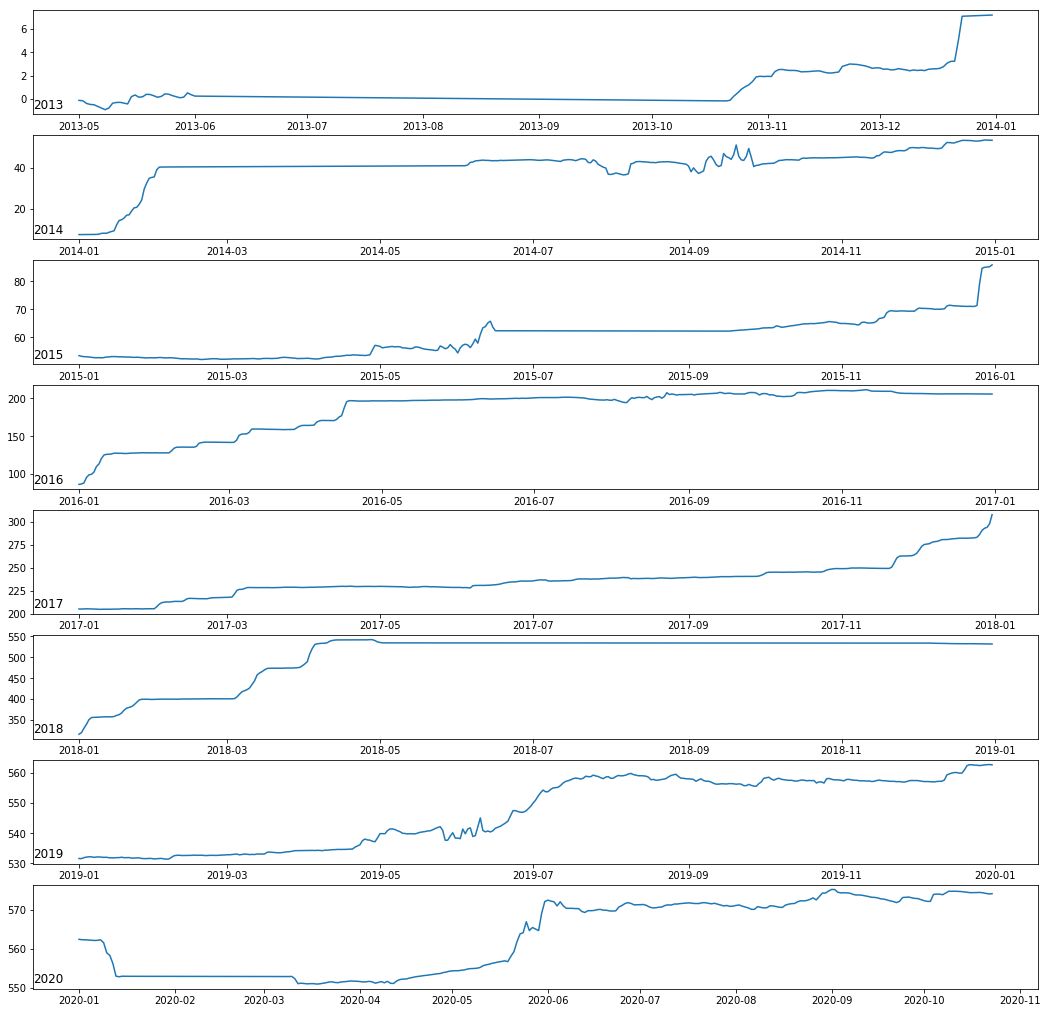

In [18]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    shallowest_df = df[str(year)]
    plt.plot(shallowest_df['0.1'])
    plt.title(str(year), y = 0, loc = 'left')
plt.show()
fig.tight_layout()

# Problem Framing:
Given recent landslide monitoring, what is the expected anamoly for the week ahead? This requires that a predictive model forecast the total threshold for each day over the next seven days

Input -> Predict

[Week1] -> Week2

[Week2] -> Week3

[Week3] -> Week4

In [29]:
dtrain = df.loc[ : ][['2.5', '2.2', '1.9', '1.6', '1.3', '1', '0.7', '0.4', '0.1']]
dtrain.head(5)

,2.5,2.2,1.9,1.6,1.3,1,0.7,0.4,0.1
TIMESTAMP,,,,,,,,,
2013-05-01,0.0,0.053260,0.079109,0.048162,0.012632,-0.018704,-0.008912,-0.046434,-0.122346
2013-05-02,0.0,0.044994,0.083609,0.084752,0.030311,0.004640,0.043121,-0.060192,-0.150943
2013-05-03,0.0,0.042431,0.036042,0.022375,-0.040006,-0.078588,0.066270,-0.162553,-0.380712
2013-05-04,0.0,0.030090,0.039781,0.029902,-0.003262,-0.022955,0.125308,-0.115533,-0.468291
2013-05-05,0.0,0.031307,0.033094,0.044868,-0.051199,-0.069161,0.027715,-0.224171,-0.493808


In [30]:
dtest = dw.loc[ : ][['2.5', '2.2', '1.9', '1.6', '1.3', '1', '0.7', '0.4', '0.1']]
dtest.head(5)

,2.5,2.2,1.9,1.6,1.3,1,0.7,0.4,0.1
TIMESTAMP,,,,,,,,,
2013-05-31,0.0,0.01914,0.06582,0.284005,0.277502,0.289312,0.248688,0.256155,0.548168
2013-06-01,0.0,0.01914,0.06582,0.284005,0.277502,0.289313,0.248688,0.256155,0.548168
2013-06-02,0.0,0.01914,0.06582,0.284005,0.277502,0.289313,0.248688,0.256155,0.548168
2013-06-03,0.0,0.01914,0.06582,0.284005,0.277502,0.289313,0.248688,0.256155,0.548168
2013-06-04,0.0,0.01914,0.06582,0.284005,0.277502,0.289313,0.248688,0.256155,0.548168


# Preparing Training Data 

In [31]:
#since 2.5 has only zero values removing that column from dtrain  and dtest 
print(dw['2.5'].unique())
print(df['2.5'].unique())
dtrain=dtrain.drop('2.5',axis=1)
dtest=dtest.drop('2.5',axis=1)

[0.]
[0.]


In [32]:
from statsmodels.tsa.stattools import adfuller
for i in dtrain.columns:
    print(i)
    adfuller_test = adfuller(dtrain[i], autolag= "AIC")
    print("ADF test statistic: {}".format(adfuller_test[0]))
    print("p-value: {}".format(adfuller_test[1]))
    

2.2
ADF test statistic: -0.602856423115167
p-value: 0.8703352850960104
1.9
ADF test statistic: -0.7525263819596938
p-value: 0.8326710626442755
1.6
ADF test statistic: -0.4883759734683701
p-value: 0.8942649560764871
1.3
ADF test statistic: -0.46210145787292434
p-value: 0.8992023866568821
1
ADF test statistic: -0.4372294682045876
p-value: 0.9036947684440266
0.7
ADF test statistic: -0.4751594861197494
p-value: 0.8967734807920216
0.4
ADF test statistic: -0.4715936212487336
p-value: 0.8974416242908845
0.1
ADF test statistic: -0.39722189475403835
p-value: 0.9105615891515426


In [33]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [34]:
reframed=series_to_supervised(dtrain)

In [35]:
values = reframed.values
train = values[:200, :]
test = values[200:, :]

In [36]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(200, 1, 15) (200,) (2532, 1, 15) (2532,)


# Building Sequential LSTM using keras

In [37]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
rgn = Sequential()
rgn.add(LSTM(units = 200, activation = 'relu', input_shape=(train_X.shape[1], train_X.shape[2])))
rgn.add(Dense(1))
rgn.compile(loss='mae', optimizer='adam')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [38]:
#train the model

model=rgn.fit(train_X, train_y, epochs = 100,batch_size=72, validation_data=(test_X, test_y))

Train on 200 samples, validate on 2532 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
200/200 [==============================] - 2s 10ms/sample - loss: 0.3718 - val_loss: 251.8680
Epoch 2/100
200/200 [==============================] - 0s 867us/sample - loss: 0.3581 - val_loss: 223.5996
Epoch 3/100
200/200 [==============================] - 0s 1ms/sample - loss: 0.3470 - val_loss: 197.1670
Epoch 4/100
200/200 [==============================] - 0s 944us/sample - loss: 0.3373 - val_loss: 145.2267
Epoch 5/100
200/200 [==============================] - 0s 919us/sample - loss: 0.3303 - val_loss: 80.2262
Epoch 6/100
200/200 [==============================] - 0s 969us/sample - loss: 0.3223 - val_loss: 30.4702
Epoch 7/100
200/200 [==============================] - 0s 887us/sample - loss: 0.3139 - val_loss: 26.5279
Epoch 8/100
200/200 [==============================] - 0s 845us/sample - loss: 0.3049 - val_loss: 72.4404
Epoch 9/100
200/200 [==============================] - 0

200/200 [==============================] - 0s 836us/sample - loss: 0.0443 - val_loss: 916.8696
Epoch 75/100
200/200 [==============================] - 0s 999us/sample - loss: 0.0436 - val_loss: 927.3344
Epoch 76/100
200/200 [==============================] - 0s 919us/sample - loss: 0.0436 - val_loss: 917.6277
Epoch 77/100
200/200 [==============================] - 0s 842us/sample - loss: 0.0420 - val_loss: 919.4408
Epoch 78/100
200/200 [==============================] - 0s 884us/sample - loss: 0.0414 - val_loss: 915.0460
Epoch 79/100
200/200 [==============================] - 0s 855us/sample - loss: 0.0408 - val_loss: 915.1109
Epoch 80/100
200/200 [==============================] - 0s 840us/sample - loss: 0.0414 - val_loss: 913.1678
Epoch 81/100
200/200 [==============================] - 0s 830us/sample - loss: 0.0413 - val_loss: 909.9022
Epoch 82/100
200/200 [==============================] - 0s 840us/sample - loss: 0.0412 - val_loss: 913.9938
Epoch 83/100
200/200 [===================

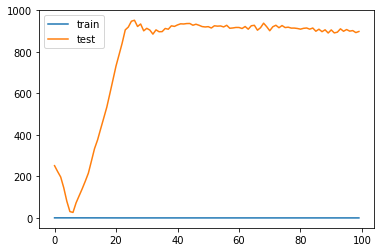

In [39]:
# plot history
from matplotlib import pyplot
pyplot.plot(model.history['loss'], label='train')
pyplot.plot(model.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [40]:
# Evaluating the model 
yhat = rgn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
#inv_yhat = np.scaler.inverse_transform(inv_yhat)   remove the comment when scaling has been applied
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)  remove the comment when scaling has been applied
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1123.104


In [41]:
### Prediction on the test data 

In [42]:
reframed_test=series_to_supervised(dtest)
test = reframed_test.values
test_X, test_y = test[:, :-1], test[:, -1]
test_X=test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
y_pred = rgn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
inv_yhat = np.concatenate((y_pred, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 491.170
